# Pymaceuticals Inc.
---

### Analysis

Tested equal amounts of male and female mice.
There is a discrepancy in the amount of mice used for each drug. There were more tests for "Capomulin" and "Ceftamin"
There was large variance in Ketapril, Stelasyn,Naftisol, and Placebo for tumor volumes.
Capomulin had the lowest tumor size overall.


In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_data= pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
#Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [166]:
# Checking the number of mice.
len(combined_data.groupby("Mouse ID"))


249

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedtable=combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicatedtable

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedtable[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata= combined_data.drop_duplicates(subset=["Mouse ID"],keep='first')
cleandata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [121]:
# Checking the number of mice in the clean DataFrame.
len(cleandata)

249

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug=combined_data.groupby("Drug Regimen")
drugmean= drug["Tumor Volume (mm3)"].mean()
drugmedian=drug["Tumor Volume (mm3)"].median()
drugvariance=drug["Tumor Volume (mm3)"].var()
drugstd=drug["Tumor Volume (mm3)"].std()
drugsem=drug["Tumor Volume (mm3)"].sem()

summary=pd.DataFrame({"Mean Tumor Volume":drugmean,
                      "Median Tumor Volume": drugmedian,
                      "Tumor Volume Variance": drugvariance,
                      "Tumor Volu   me Std. Dev.": drugstd,
                      "Tumor Volume Std. Err.": drugsem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volu me Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

drug["Tumor Volume (mm3)"].agg(['mean','median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

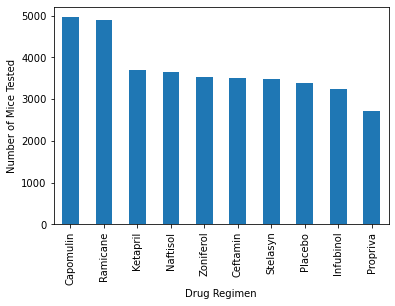

In [293]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

y=combined_data.groupby('Drug Regimen')['Timepoint'].sum()
y=y.sort_values(ascending=False)
barchart=y.plot.bar(x='Drug Regimen',y='sum')
barchart.set_ylabel("Number of Mice Tested")
barchart 

Text(0, 0.5, 'Number of Mice Tested')

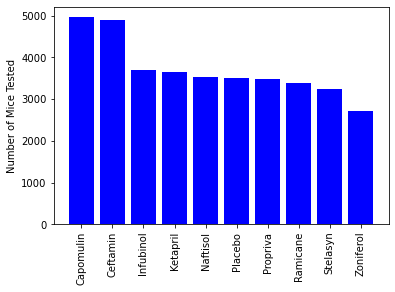

In [222]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pd.DataFrame(y)
num=list(y)
names=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
final=plt.bar(names,num, color="b", align="center")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9B89BE908>],
      dtype=object)

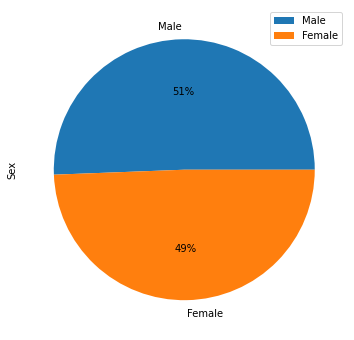

In [287]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = combined_data["Sex"].value_counts()
df=pd.DataFrame(data=sizes,index = labels)
df.plot.pie(subplots=True, figsize=(11, 6),  autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x2a9b9b75988>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '51%'),
  Text(0.3768307694048699, 0.46690317114979385, '49%')])

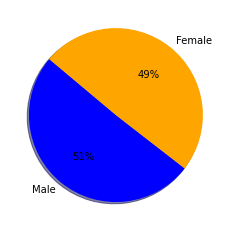

In [288]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male",'Female']
sizes = combined_data["Sex"].value_counts()

colors = ["blue","orange"]

plt.pie(sizes,  labels=labels, autopct='%1.0f%%', colors=colors,shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [335]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
newdata= combined_data.loc[combined_data['Drug Regimen'] .isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
neww=newdata.groupby(["Mouse ID"])["Timepoint"].transform(max) == newdata["Timepoint"]
# Start by getting the last (greatest) timepoint for each mouse
ltumor=newdata[neww]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaldata=pd.merge(combined_data, ltumor, how= "right" )
finaldata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [336]:
# Put treatments into a list for for loop (and later for plot labels)
listdrug=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
empty=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = finaldata['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
finaldata.loc[]
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers=finaldata.loc[finaldata['Tumor Volume (mm3)'] < lower_bound) | finaldata['Tumor Volume (mm3)'] > upper_bound)]
outliers

SyntaxError: invalid syntax (4205168260.py, line 19)

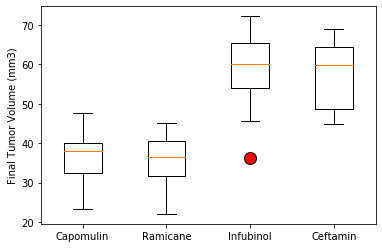

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

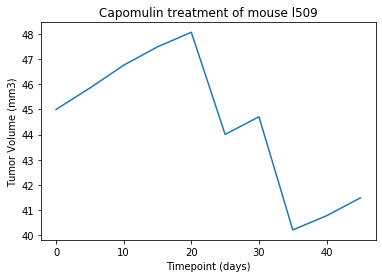

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



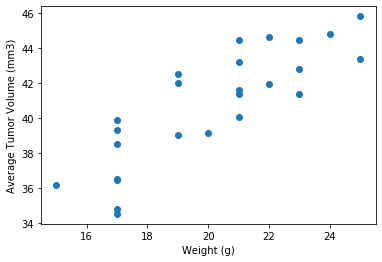

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


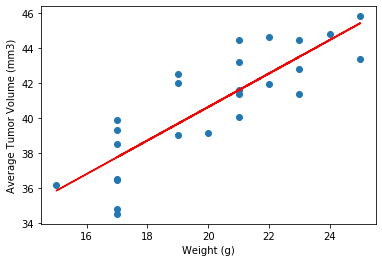

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

